<a href="https://colab.research.google.com/github/GlowDanBios/Durak/blob/master/dtps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("dtpData.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from sklearn.cluster import DBSCAN

In [4]:
data

,Unnamed: 0,DTP_V,District,number_TS,number_participants,POG,RAN,Time,date,infoDtp,rowNum,NDU_1,NDU_2,NDU_3,NDU_4,SDOR_1,SDOR_2,Street,House,Door,KM,M,Street_type,Dor_k,Road_scale,Road_status,Change_motion,S_dtp,COORD_W,COORD_L,Weather_1,Weather_2,Отсутствие в непосредственной близости объектов УДС и объектов притяжения,Многоквартирные жилые дома,Остановка общественного транспорта,Автостоянка (отделенная от проезжей части),Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта),Производственное предприятие,Нерегулируемый перекрёсток,"Гаражные постройки (гаражный кооператив, товарищество либо иное место концентрированного размещения гаражей)",Школа либо иное детское (в т.ч. дошкольное) учреждение,Регулируемый перекрёсток,"Одиночный торговый объект, являющийся местом притяжения транспорта и (или) пешеходов","Аэропорт, ж/д вокзал (ж/д станция), речной или морской порт (пристань)","Объект (здание, сооружение) религиозного культа","Эстакада, путепровод",АЗС,Зоны отдыха,Нерегулируемый пешеходный переход,Регулируемый пешеходный переход,Иное образовательное учреждение,Спортивные и развлекательные объекты,Мост,Административные здания,Подземный пешеходный переход,Иной объект,Лечебные учреждения,Жилые дома индивидуальной застройки,Нерегулируемое пересечение с круговым движением,Остановка трамвая,Объект строительства,Тоннель,Надземный пешеходный переход,Территориальное подразделение МВД России (либо его структурное подразделение),Автовокзал (автостанция),"Объект торговли, общественного питания на автодороге вне НП",Регулируемый ж/д переезд без дежурного,Кладбище,Остановка маршрутного такси,СП ДПС (КПМ),Регулируемый ж/д переезд с дежурным,Нерегулируемый ж/д переезд,Стихийно возникшая (не предусмотренная) ледовая переправа,Медицинские (лечебные) организации,Школа либо иная детская (в т.ч. дошкольная) организация,Иная образовательная организация,Пункт весового контроля
0,0,Наезд на стоящее ТС,Южное Тушино,2,3,0,1,19:35,28.12.2015,"{'ndu': ['Не установлены'], 'sdor': ['Перегон ...",1,Не установлены,NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),NaN,NaN,NaN,Внутренняя сторона,70.0,700.0,Вне НП,1.0,Региональная или межмуниципальная (дорога реги...,Сухое,Режим движения не изменялся,910,55.85,37.393,Пасмурно,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,Наезд на пешехода,Южное Тушино,1,2,1,0,08:05,24.12.2015,"{'ndu': ['Не установлены'], 'sdor': ['Перегон ...",2,Не установлены,NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),Внутридворовая территория,б-р Яна Райниса,6 к. 3,NaN,NaN,NaN,Магистральные улицы районного значения,NaN,Не указано,Мокрое,Режим движения не изменялся,780,55.8536,37.4283,Пасмурно,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,Наезд на пешехода,Южное Тушино,1,2,1,0,09:10,22.12.2015,{'ndu': ['Отсутствие дорожных знаков в необход...,3,Отсутствие дорожных знаков в необходимых местах,NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),NaN,проезд Походный,15,NaN,NaN,NaN,Магистральные улицы общегородского значения,NaN,Не указано,Мокрое,Режим движения не изменялся,820,55.8373,37.4148,Дождь,NaN,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,Падение пассажира,Южное Тушино,1,2,0,1,08:20,22.12.2015,"{'ndu': ['Не установлены'], 'sdor': ['Перегон ...",4,Не установлены,NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),Нерегулируемый пеше

In [5]:
data.columns

Index(['Unnamed: 0', 'DTP_V', 'District', 'number_TS', 'number_participants',
       'POG', 'RAN', 'Time', 'date', 'infoDtp', 'rowNum', 'NDU_1', 'NDU_2',
       'NDU_3', 'NDU_4', 'SDOR_1', 'SDOR_2', 'Street', 'House', 'Door', 'KM',
       'M', 'Street_type', 'Dor_k', 'Road_scale', 'Road_status',
       'Change_motion', 'S_dtp', 'COORD_W', 'COORD_L', 'Weather_1',
       'Weather_2',
       'Отсутствие в непосредственной близости объектов УДС и объектов притяжения',
       'Многоквартирные жилые дома', 'Остановка общественного транспорта',
       'Автостоянка (отделенная от проезжей части)',
       'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)',
       'Производственное предприятие', 'Нерегулируемый перекрёсток',
       'Гаражные постройки (гаражный кооператив, товарищество либо иное место концентрированного размещения гаражей)',
       'Школа либо иное детское (в т.ч. дошкольное) учреждение',
       'Регулируемый перекрёсток',
       'Од

Убиваем говно

In [6]:
x = data
x = x.drop('Unnamed: 0', axis=1)
x = x.drop('rowNum', axis=1)
x = x.drop('House', axis=1)
x = x.drop('Street', axis=1)
x = x.drop('Time', axis=1)
x = x.drop('date', axis=1)
x = x.drop('infoDtp', axis=1)
x = x.drop('COORD_W', axis=1)
x = x.drop('COORD_L', axis=1)


Делаем дамисы


In [7]:
x = pd.concat([x,pd.get_dummies(x["DTP_V"])], axis=1)
x = x.drop("DTP_V", axis=1)
x = pd.concat([x,pd.get_dummies(x["District"])], axis=1)
x = x.drop("District", axis=1)
x = pd.concat([x,pd.get_dummies(x["NDU_1"])], axis=1)
x = x.drop("NDU_1", axis=1)
x = pd.concat([x,pd.get_dummies(x["NDU_2"])], axis=1)
x = x.drop("NDU_2", axis=1)
x = pd.concat([x,pd.get_dummies(x["NDU_3"])], axis=1)
x = x.drop("NDU_3", axis=1)
x = pd.concat([x,pd.get_dummies(x["NDU_4"])], axis=1)
x = x.drop("NDU_4", axis=1)
x = pd.concat([x,pd.get_dummies(x["SDOR_1"])], axis=1)
x = x.drop("SDOR_1", axis=1)
x = pd.concat([x,pd.get_dummies(x["SDOR_2"])], axis=1)
x = x.drop("SDOR_2", axis=1)
x = pd.concat([x,pd.get_dummies(x["Door"])], axis=1)
x = x.drop("Door", axis=1)
x = pd.concat([x,pd.get_dummies(x["Street_type"])], axis=1)
x = x.drop("Street_type", axis=1)
x = pd.concat([x,pd.get_dummies(x["Road_scale"])], axis=1)
x = x.drop("Road_scale", axis=1)
x = pd.concat([x,pd.get_dummies(x["Road_status"])], axis=1)
x = x.drop("Road_status", axis=1)
x = pd.concat([x,pd.get_dummies(x["Change_motion"])], axis=1)
x = x.drop("Change_motion", axis=1)
x = pd.concat([x,pd.get_dummies(x["Weather_1"])], axis=1)
x = x.drop("Weather_1", axis=1)
x = pd.concat([x,pd.get_dummies(x["Weather_2"])], axis=1)
x = x.drop("Weather_2", axis=1)

Удаляем столбцы в которых кривая дата, тк мне лень

In [8]:
i = 1
for column in x.columns:
  try:
    if str(type(x[column])) == "<class 'pandas.core.frame.DataFrame'>" :
      x = x.drop(column, axis=1)
  except:
    continue
   

In [9]:
x.shape

(57130, 290)

Убираем наны

In [10]:
x = x.fillna(0)

Eps - максимальное ратояние между точками в одном кластере

In [11]:
m = DBSCAN(eps=10).fit(x)

In [12]:
clusters= {}

Записываем какие дтп в каком кластере

In [13]:
for i in range(len(m.labels_)):
  l = m.labels_[i]
  if l != -1:
    if l not in clusters.keys():
      clusters[l] = [i] 
    else:
      clusters[l].append(i)

In [14]:
data.loc[clusters[19]]

,Unnamed: 0,DTP_V,District,number_TS,number_participants,POG,RAN,Time,date,infoDtp,rowNum,NDU_1,NDU_2,NDU_3,NDU_4,SDOR_1,SDOR_2,Street,House,Door,KM,M,Street_type,Dor_k,Road_scale,Road_status,Change_motion,S_dtp,COORD_W,COORD_L,Weather_1,Weather_2,Отсутствие в непосредственной близости объектов УДС и объектов притяжения,Многоквартирные жилые дома,Остановка общественного транспорта,Автостоянка (отделенная от проезжей части),Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта),Производственное предприятие,Нерегулируемый перекрёсток,"Гаражные постройки (гаражный кооператив, товарищество либо иное место концентрированного размещения гаражей)",Школа либо иное детское (в т.ч. дошкольное) учреждение,Регулируемый перекрёсток,"Одиночный торговый объект, являющийся местом притяжения транспорта и (или) пешеходов","Аэропорт, ж/д вокзал (ж/д станция), речной или морской порт (пристань)","Объект (здание, сооружение) религиозного культа","Эстакада, путепровод",АЗС,Зоны отдыха,Нерегулируемый пешеходный переход,Регулируемый пешеходный переход,Иное образовательное учреждение,Спортивные и развлекательные объекты,Мост,Административные здания,Подземный пешеходный переход,Иной объект,Лечебные учреждения,Жилые дома индивидуальной застройки,Нерегулируемое пересечение с круговым движением,Остановка трамвая,Объект строительства,Тоннель,Надземный пешеходный переход,Территориальное подразделение МВД России (либо его структурное подразделение),Автовокзал (автостанция),"Объект торговли, общественного питания на автодороге вне НП",Регулируемый ж/д переезд без дежурного,Кладбище,Остановка маршрутного такси,СП ДПС (КПМ),Регулируемый ж/д переезд с дежурным,Нерегулируемый ж/д переезд,Стихийно возникшая (не предусмотренная) ледовая переправа,Медицинские (лечебные) организации,Школа либо иная детская (в т.ч. дошкольная) организация,Иная образовательная организация,Пункт весового контроля
62,62,Столкновение,Южное Тушино,2,2,0,1,22:10,01.06.2015,"{'ndu': ['Не установлены'], 'sdor': ['Перегон ...",63,Не установлены,NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),NaN,ул Свободы,38-1,NaN,NaN,NaN,Магистральные улицы районного значения,NaN,Не указано,Сухое,Режим движения не изменялся,500,55.8446,37.4552,Ясно,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69,69,Столкновение,Южное Тушино,4,4,0,1,11:05,06.05.2015,{'ndu': ['Отсутствие дорожных знаков в необход...,70,Отсутствие дорожных знаков в необходимых местах,NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),Регулируемый перекресток,ул Сходненская,37,NaN,NaN,NaN,Улицы и дороги местного значения в жилой застр...,NaN,Не указано,Сухое,Режим движения не изменялся,500,55.8492,37.4397,Ясно,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
82,82,Столкновение,Южное Тушино,2,3,0,1,17:30,15.03.2015,"{'ndu': ['Неправильное применение, плохая види...",83,"Неправильное применение, плохая видимость доро...",NaN,NaN,NaN,Перегон (нет объектов на месте ДТП),Выезд с прилегающей территории,ул Василия Петушкова,7,NaN,NaN,NaN,Улицы и дороги местного значения в жилой застр...,NaN,Не указано,Сухое,Движение частично перекрыто,500,55.5011,37.2419,Ясно,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88,88,Столкновение,Южное Тушино,2,2,0,1,16:34,25.02.2015,"{'ndu': ['Не установлены'], 'sdor': ['Перегон ...",89,Не установлены,NaN,NaN,NaN,Перегон (

In [15]:
m.get_params()

{'algorithm': 'auto',
 'eps': 10,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [16]:
n = 0
for k in clusters.keys():
  n+=len(clusters[k])

In [17]:
import matplotlib.pyplot as plt


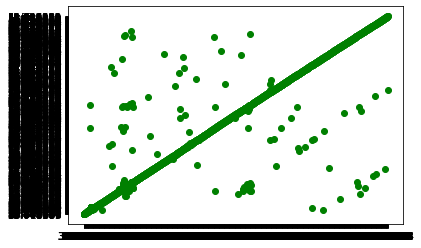

In [27]:
c = clusters[19]
for p in c:
  plt.scatter(data.iloc[p]["COORD_L"], data.iloc[p]["COORD_W"], color="green")

In [29]:
for c in clusters.keys():
  print(len(clusters[c]))

21
8440
1763
3077
11944
9453
1321
33
55
392
29
2552
1809
411
446
2345
967
1440
1317
4047
69
168
616
199
97
112
18
57
22
137
22
5
10
94
444
33
25
31
39
58
152
16
10
22
19
12
33
7
18
11
6
41
35
97
28
5
8
7
21
9
16
6
26
5
25
16
7
6
6
5
49
6
9
6
8
6
10
6
5
5
7
7
5
10
5
32
25
5
94
20
28
6
28
11
11
14
14
9
13
16
7
16
6
15
12
6
11
6
6
6
7
6
6
19
14
7
5
5
5
6
5
5
5
7
5
5
